In [1]:
'''
Inputs a YX-resolution (2D) image I and outputs a 3YX-resolution (3D) stack S where:

S[0,...] == np.roll(I, shift=1, axis=(-1,-1))
S[1,...] == I
S[2,...] == np.roll(I, shift=1, axis=(1,1))

'''

'\nInputs a YX-resolution (2D) image I and outputs a 3YX-resolution (3D) stack S where:\n\nS[0,...] == np.roll(I, shift=1, axis=(-1,-1))\nS[1,...] == I\nS[2,...] == np.roll(I, shift=1, axis=(1,1))\n\n'

In [2]:
!which python
!pip install --upgrade pip

/shared/PEs/MP/bin/python


In [3]:
!pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
from image_IO import image_1 as gray_image
from image_IO import image_3 as RGB_image

  Cloning https://github.com/vicente-gonzalez-ruiz/image_IO to /tmp/pip-install-5um9m9bj/image-io_9fdbb770aa8d443581dd8ec26c145161
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/image_IO /tmp/pip-install-5um9m9bj/image-io_9fdbb770aa8d443581dd8ec26c145161
  Resolved https://github.com/vicente-gonzalez-ruiz/image_IO to commit 5dff57f270436b2f3de403e9ae1eeb2ee7be5712
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
!pip install mrcfile
import mrcfile

In [5]:
import numpy as np

In [6]:
import skimage

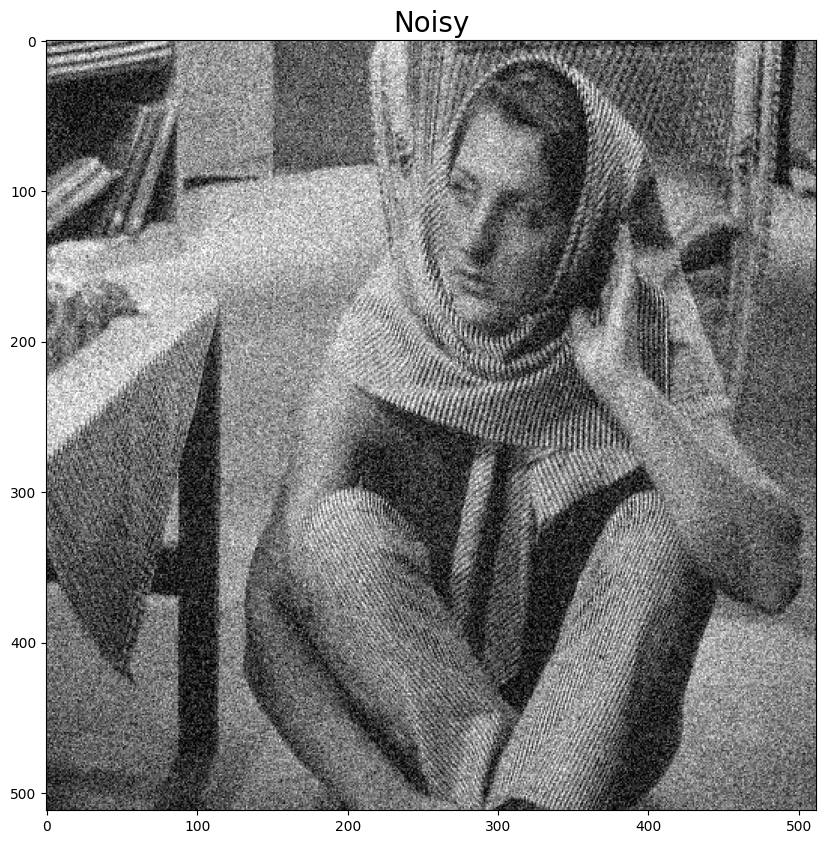

In [7]:
from collections import namedtuple
Args = namedtuple("args", "input output")
args = Args("barb_noisy.png", "barb_noisy.mrc")
img = gray_image.read(args.input)
gray_image.show(img, "Noisy")

In [8]:
N = 65
SHIFT = 0
#stack = np.empty(shape=(img.shape[0], img.shape[1], 3))
#for i in range(N):
#    stack[...,i] = np.roll(img, shift=(i-N//2)*SHIFT, axis=0)
#    stack[...,i] = np.roll(stack[...,i], shift=(i-N//2)*SHIFT, axis=0)
stack = np.stack([np.roll(img, shift=(i-N//2)*SHIFT, axis=0) for i in range(N)])
stack = np.stack([np.roll(stack[i], shift=(i-N//2)*SHIFT, axis=1) for i in range(N)])

In [9]:
#for i in range(N):
#    gray_image.show(stack[i], f"stack[{i}]")

In [10]:
#skimage.io.imsave(args.output, stack, plugin="tifffile")

In [11]:
with mrcfile.new(args.output, overwrite=True) as mrc:
    mrc.set_data(stack.astype(np.float32))
    mrc.data